In [47]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (15, 10)

One example of nonsequential neural network is the algorithm proposed by Cheng et al. (2016). 

Their algorithm is basically made of two components. The first component is a deep multilayer perceptron which they call "Deep Models" (figure below). The second component consists of a direct connection between the input layer and the output unit. The result is what the authors call a "Wide and Deep Models".

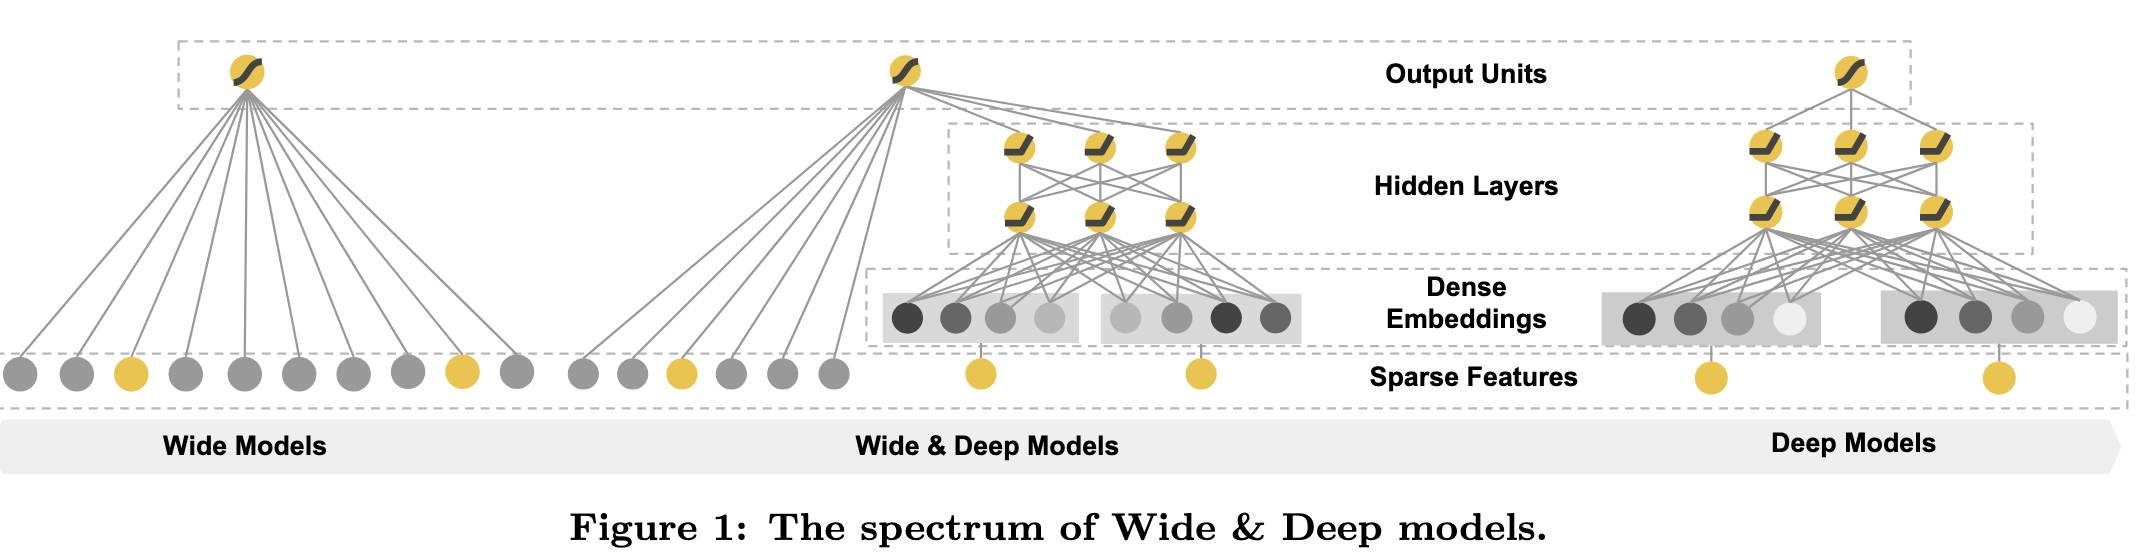

In what follows, we use the california housing data (explanied in example3-mlp-reg-keras.ipynb) to build the Wide and Deep model explained above.

### Data preprocessing

In [34]:
scaler = StandardScaler()
housing_data = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing_data["data"],
                                                              housing_data["target"],
                                                              train_size=0.5)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_full,
                                                                y_train_full,
                                                                train_size=0.75)

X_train_scaled = scaler.fit_transform(X_train) 
X_valid_scaled = scaler.transform(X_validation) 
X_test_scaled = scaler.transform(X_test)

### Modelling approach

Lets go through below model in a little more detail. The first three lines of code builds the first component of the network, that is, it builds a feed-forward neural network with two hidden layers, each of which with 30 hidden units. The main difference of this network relies on the third line of code. This line builds the second model component, which takes the input layer, appends with the output from the second hidden layer, and than pass all of it through the output layer.

In [41]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

### Optimization

In [43]:
model.compile(loss="mse", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_validation))

Train on 7740 samples, validate on 2580 samples
Epoch 1/20
7740/7740 [==============================] - 1s 90us/sample - loss: 0.3431 - val_loss: 0.4100
Epoch 2/20
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3374 - val_loss: 0.3845
Epoch 3/20
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3331 - val_loss: 0.4063
Epoch 4/20
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3331 - val_loss: 0.3750
Epoch 5/20
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3293 - val_loss: 0.3799
Epoch 6/20
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3293 - val_loss: 0.4153
Epoch 7/20
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3261 - val_loss: 0.3717
Epoch 8/20
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3252 - val_loss: 0.3796
Epoch 9/20
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3246 - val_loss: 0.3804
Epoch 1

In [45]:
mse_test = model.evaluate(X_test, y_test)

10320/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

<AxesSubplot:>

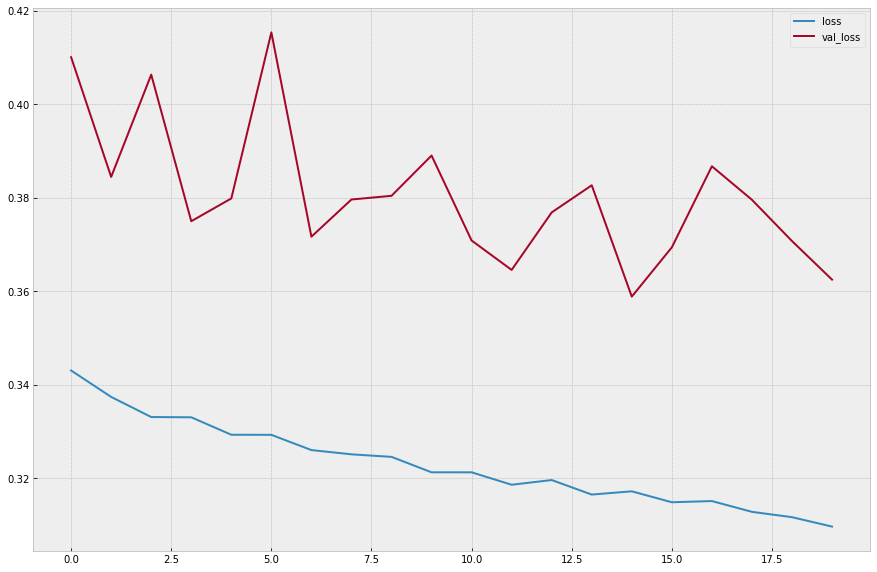

In [48]:
pd.DataFrame(history.history).plot()